In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adp-kr-p4/problem2_usage_history.csv
/kaggle/input/adp-kr-p4/problem1.csv
/kaggle/input/adp-kr-p4/problem2_usage.csv
/kaggle/input/adp-kr-p4/problem2_avg_tem.csv


# 1번
철강데이터 종속변수 : target     
데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates    
데이터 경로 : /kaggle/input/adp-kr-p4/problem1.csv


### 1-1  EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

In [3]:
df1 = pd.read_csv('/kaggle/input/adp-kr-p4/problem1.csv')
df1.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

모든 변수가 수치형 변수로 구성되어 있는 것을 확인

In [5]:
df1.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,4.841319
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,2.144175
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,1.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,3.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,6.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,7.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,7.000000


In [6]:
df1.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

데이터에 결측치가 존재하지 않아 따로 고려하지 않아도 됨

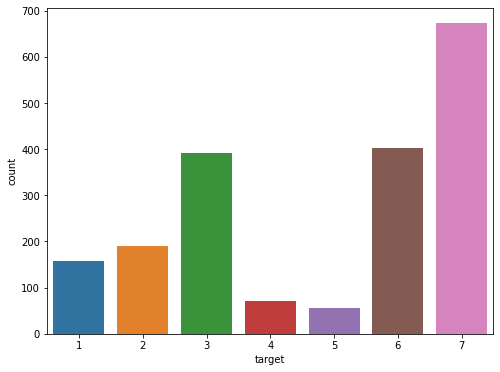

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(x='target', data=df1)
plt.show()

종속변수인 'target'은 1~7사이의 정수로 구성되어 있으며, 그중 7이 가장 많은 것을 확인하였다. 

- 회귀분석
- 다중 분류
- 특정한 숫자(ex:1)을 기준으로 0/1로 재구성후 분류 모델 생성

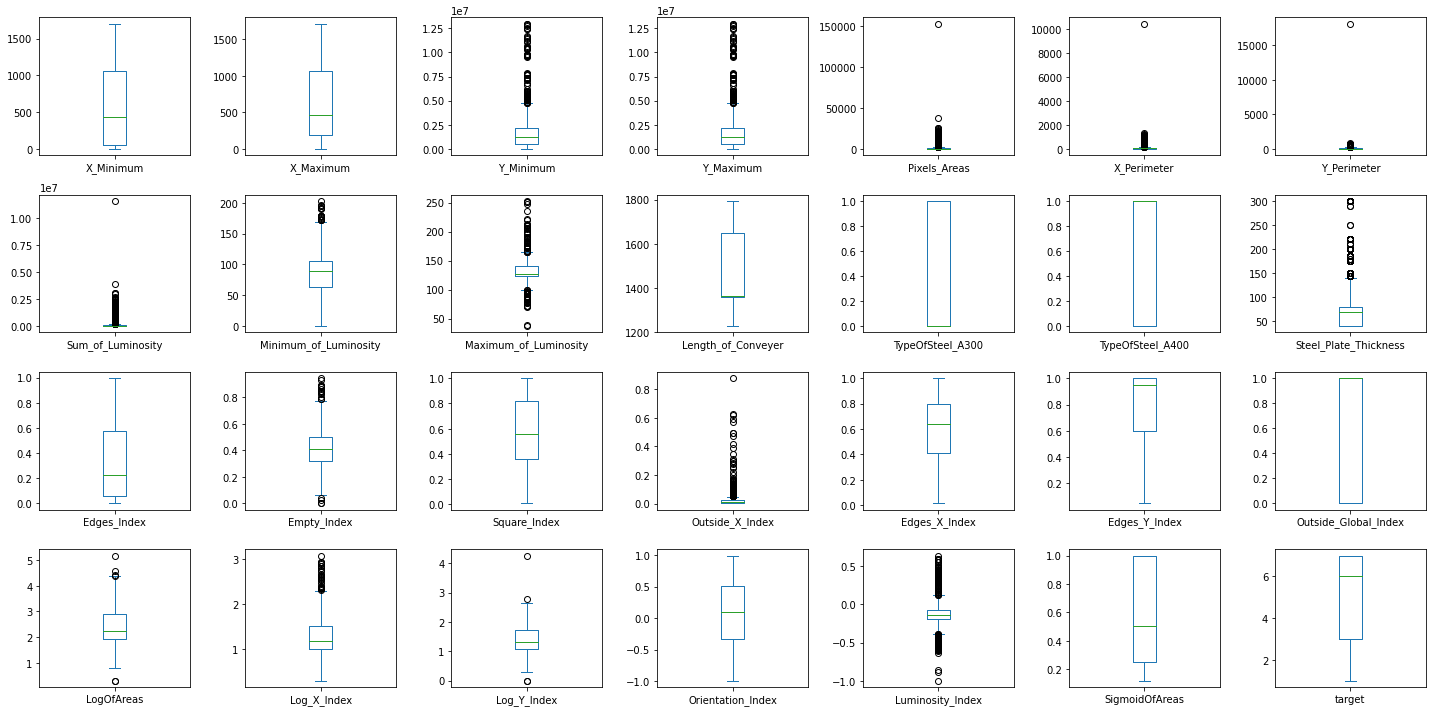

In [8]:
df1.plot(kind='box', subplots=True, layout=(4,7), figsize=(20,10))
plt.tight_layout()
plt.show()

모든 변수에 대체적으로 많은 이상치가 존재하는 것을 확인함

### 1-2 변수 선택(VIF), 파생변수 생성, 데이터 분할(train/test(20%))
(시각화와 통계량을 제시할 것)

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1['av']  = (df1['X_Minimum'] + df1['X_Maximum'])/2
value ='+'.join(list(df1.drop(columns=['target']).columns))
model = ols(f'target ~ {value}', df1)
model.exog_names


vif = pd.DataFrame({'col': col, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, col in enumerate(model.exog_names[1:])).sort_values('VIF',ascending=False)

vif

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,col,VIF
13,Steel_Plate_Thickness,inf
1,X_Maximum,inf
2,Y_Minimum,inf
12,TypeOfSteel_A400,inf
4,Pixels_Areas,1.703264e+10
3,Y_Maximum,1.703244e+10
7,Sum_of_Luminosity,1.559205e+03
22,Log_X_Index,1.185824e+03
18,Edges_X_Index,1.000563e+03
23,Log_Y_Index,4.911691e+02


VIF값이 10이상이면 다중공선성이 존재한다고 판단 -> 삭제

10 미만인 변수 : X_Minimum, Edges_Index, Empty_Index, Outside_X_Index, TypeOfSteel_A300, Edges_Y_Index, LogOfAreas, Length_of_Conveyer, Maximum_of_Luminosity, Outside_Global_Index, av

In [10]:
df2 = df1.copy()[list(vif[vif.VIF<10].col.values) + ['target']]

df2.head()

,av,Outside_Global_Index,Maximum_of_Luminosity,Length_of_Conveyer,LogOfAreas,Edges_Y_Index,TypeOfSteel_A300,Outside_X_Index,Empty_Index,Edges_Index,X_Minimum,target
0,46.0,1.0,108,1687,2.4265,1.0000,1,0.0047,0.2415,0.0498,42,1
1,648.0,1.0,123,1687,2.0334,0.9667,1,0.0036,0.3793,0.7647,645,1
2,832.0,1.0,125,1623,1.8513,0.9474,1,0.0037,0.3426,0.9710,829,1
3,856.5,1.0,126,1353,2.2455,1.0000,0,0.0052,0.4413,0.7287,853,1
4,1297.5,1.0,126,1353,3.3818,0.9885,0,0.0126,0.4486,0.0695,1289,1


In [11]:
from sklearn.model_selection import train_test_split

X = df2[list(df2.columns.difference(['target']))]
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1552, 11) (389, 11)
(1552,) (389,)


### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [12]:
X2 = X.copy()
y2 = y.apply(lambda x: 1 if x==1 else 0)
print(y2.value_counts())

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=0)
print(X_train2.shape, X_test2.shape)
print(y_train2.shape, y_test2.shape)

0    1783
1     158
Name: target, dtype: int64
(1552, 11) (389, 11)
(1552,) (389,)


In [13]:
y_train2.value_counts()

0    1426
1     126
Name: target, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train2, y_train2)

lr_pred = lr.predict(X_test2)
proba = lr.predict_proba(X_test2)

데이터 포인트가 양성 클래스인 1에 속할 확률을 구함

양수값 -> 양성 클래스 , 음수값 -> 음수 클래스

In [15]:
from sklearn.metrics import classification_report, roc_curve

print(classification_report(y_test2, lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       357
           1       0.43      0.09      0.15        32

    accuracy                           0.92       389
   macro avg       0.68      0.54      0.55       389
weighted avg       0.88      0.92      0.89       389



In [16]:
from sklearn.metrics import plot_roc_curve

fpr, tpr, threshold = roc_curve(y_test2, proba[:,1])

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_threshold = threshold[ix]

print('Best Treshold = %f, sensitivity = %.3f, specificity = %.3f, J = %.3f' %(best_threshold, tpr[ix], 1-fpr[ix], J[ix]))

Best Treshold = 0.128821, sensitivity = 0.938, specificity = 0.838, J = 0.775


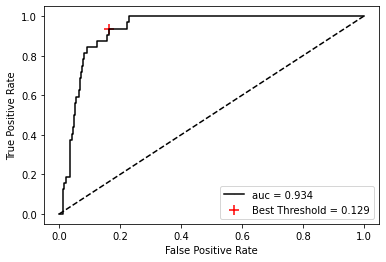

In [17]:
from sklearn.metrics import roc_auc_score

# plot roc and best threshold
sens, spec = tpr[ix], 1-fpr[ix]

#plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr, tpr, marker='.', color='black', markersize=0.05, label='auc = %.3f' % roc_auc_score(y_test2, proba[:,1]))
plt.scatter(fpr[ix], tpr[ix], marker='+', s=100, color='r',
           label = "Best Threshold = %.3f"%(best_threshold))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')

plt.show()

### 1-4 종속변수(y)를 다항(7 class)인 상태에서 SVM을 포함하여 3가지 알고리즘으로 평가하라.
각 모델에서 confusionMatrix를 확인하고 최적의 cut off value 를 정하여라.

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

svc = SVC(C=0.5)
rf = RandomForestClassifier()
dc = DecisionTreeClassifier()

def cf_mat(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('model : ', model)
    print(classification_report(y_test, pred),'\n')
    print('정확도 : ',accuracy_score(y_test, pred))
    
    return pred

In [19]:
svc_pred = cf_mat(svc)

model :  SVC(C=0.5)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        38
           3       0.45      0.85      0.59        78
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        81
           7       0.42      0.76      0.54       135

    accuracy                           0.43       389
   macro avg       0.12      0.23      0.16       389
weighted avg       0.24      0.43      0.31       389
 

정확도 :  0.4318766066838046


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
rf_pred = cf_mat(rf)

model :  RandomForestClassifier()
              precision    recall  f1-score   support

           1       0.65      0.41      0.50        32
           2       0.86      0.84      0.85        38
           3       1.00      0.90      0.95        78
           4       1.00      0.86      0.92        14
           5       1.00      0.73      0.84        11
           6       0.69      0.64      0.67        81
           7       0.65      0.81      0.72       135

    accuracy                           0.76       389
   macro avg       0.84      0.74      0.78       389
weighted avg       0.77      0.76      0.76       389
 

정확도 :  0.7609254498714653


In [21]:
dc_pred = cf_mat(dc)

model :  DecisionTreeClassifier()
              precision    recall  f1-score   support

           1       0.38      0.31      0.34        32
           2       0.74      0.82      0.78        38
           3       0.93      0.90      0.92        78
           4       0.93      0.93      0.93        14
           5       0.71      0.45      0.56        11
           6       0.59      0.57      0.58        81
           7       0.64      0.70      0.67       135

    accuracy                           0.69       389
   macro avg       0.70      0.67      0.68       389
weighted avg       0.69      0.69      0.69       389
 

정확도 :  0.6915167095115681


### 1-5 종속변수를 제외한 나머지 데이터를 바탕으로 군집분석을 실시하고 최적의 군집수와 군집 레이블을 구하여라. 
군집레이블을 추가한 데이터를 1-4에서 만든 모델중 가장 성능이 좋았던 하나의 모델에 다시 학습하여 F1-score를 비교하라 

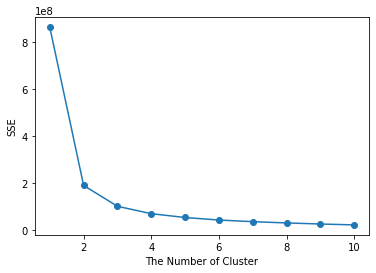

[861645505.5503397, 188751403.7382258, 100148326.68150009, 68616197.53146452, 52419055.26951208, 41628679.88456083, 34694640.644682914, 29301138.2368939, 24747099.51156418, 20869529.58080966]


In [22]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Cluster')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(X_train)

KMeans에서 최적의 군집의 개수는 3으로 판단하였다. 

In [23]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters = 3, random_state=0)
km.fit(X_train)
train_label = km.predict(X_train)
test_label = km.predict(X_test)

X_train_cluster = X_train.reset_index(drop=True).copy()
X_test_cluster = X_test.reset_index(drop=True).copy()

X_train_cluster.loc[:, 'cluster'] = train_label
X_test_cluster.loc[:, 'cluster'] = test_label

rf = RandomForestClassifier()
rf.fit(X_train_cluster, y_train)
rf_pred = rf.predict(X_test_cluster)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.78      0.44      0.56        32
           2       0.86      0.82      0.84        38
           3       1.00      0.90      0.95        78
           4       1.00      0.86      0.92        14
           5       1.00      0.64      0.78        11
           6       0.68      0.62      0.65        81
           7       0.63      0.81      0.71       135

    accuracy                           0.75       389
   macro avg       0.85      0.72      0.77       389
weighted avg       0.77      0.75      0.75       389



f1 score 값은 거의 변하지 않음

# 2번 전력데이터
데이터 출처 : 직접제작    
데이터 설명 : 2050년 1년동안의 5유형(A,B,C,D,E)의 전력사용량을 나타낸다. 각유형의 전력사용량은 1분마다 갱신되며 그 값은 누적된다.       
6시간이 지나면(00:00, 06:00, 12:00, 18:00시에) 전력사용량은 0으로 초기화 된다.

- /kaggle/input/adp-kr-p4/problem2_usage.csv   
6시간 간격의 총 전력사용량의 데이터이다. timestamp순서는 섞여있다.      
6시간 간격의 특정 시간대(마지막시각 '05:59','11:59','17:59','23:59')의 전력 총합을 나타낸다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.    


- /kaggle/input/adp-kr-p4/problem2_usage_history.csv   
1분간격의 A,B,C,D,E 유형의 소비 누적 전력을 나타낸다. 같은 6시간간격의 시간대의 데이터는 같은 "6hour_index"값을 가진다.    
00:00, 06:00, 12:00, 18:00시에는 5유형의 전력은 초기화 된다.     
데이터의 총합을 구해서 비교할때 부동소수점 오류가 날수 있다. 파이썬의 경우 round(4)를 취하여 해결한다.     
 

- /kaggle/input/adp-kr-p4/problem2_avg_tem.csv    
2050년 1년동안 일자별 평균 온도를 나타낸다     

### 2-1 usage의 총사용량을 아래와 같은 모양으로 연월별 총합으로 계산하여 CSV 파일로 작성하시오.    
- 일자별 총사용량은 누적사용량이 갱신되기 직전의 최대값들의 합으로 계산한다     
- ['05:59','11:59','17:59','23:59'] 시간대의 A,B,C,D,E의 컬럼별 총합이 각 유형의 일일 사용량이다     

![image](https://github.com/Datamanim/datarepo/blob/main/adp/p4/p2.png?raw=true)

In [40]:
us = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_usage.csv')
ush = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_usage_history.csv')

us['time'] = pd.to_datetime(us.timestamp, unit='s')
us = us.sort_values('time').reset_index(drop=True)

s = ush[ush['hh:mm'].isin(['05:59', '11:59', '17:59', '23:59'])]
s2 = s.copy()
s2.loc[:,'t'] = s.iloc[:,2:].sum(axis=1).round(4)


zz = pd.merge(ush, pd.merge(s2.rename(columns = {'t':'usage'}).reset_index(drop=True),us)[['6hour_index','time']])
zz['time'] = pd.to_datetime(zz['time'])

q = zz[zz['hh:mm'].isin(['05:59', '11:59', '17:59', '23:59'])].copy()
q.loc[:,'date'] = q['time'].dt.strftime('%Y-%m')
q.groupby('date').sum()

,A,B,C,D,E
date,,,,,
2050-01,25437.7174,29524.6880,26325.6721,26787.3492,24378.5654
2050-02,22587.0869,27962.4256,21188.7855,23261.3711,24636.3545
2050-03,28677.4668,23861.8640,23680.9832,26945.8322,27807.9163
2050-04,24420.2217,27322.6681,26299.6225,27226.8895,24303.1778
2050-05,27028.2178,25173.2009,30392.3686,28374.1651,26624.1963
2050-06,23862.7219,25125.0544,26334.0899,23571.0519,32754.0932
2050-07,26248.3486,25135.6214,28735.8080,31315.0381,27056.5461
2050-08,29171.1880,26769.4921,20612.4922,27432.0263,23671.4985
2050-09,26819.4225,31334.2996,25562.1052,22301.2104,25674.1093


### 2-2 가로축을 요일(일~월) 세로축을 평균 전력사용량으로 하는 그래프를 그려라. 각 유형별로 색을 다르게 표현하여 5개의 line plot을 그리며 범례를 표시하라

<AxesSubplot:xlabel='day'>

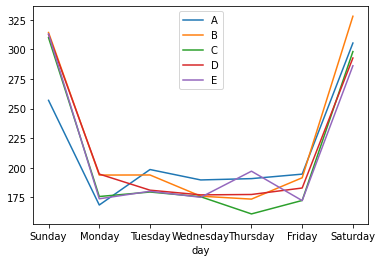

In [42]:
q['day'] = q['time'].dt.day_name()
daydf = q.groupby(['day']).mean().reindex(['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
daydf.plot()

In [43]:
daydf

,A,B,C,D,E
day,,,,,
Sunday,256.9294,314.2883,309.8940,312.6150,313.0920
Monday,168.4361,193.7592,175.6238,194.6114,173.6964
Tuesday,198.4351,193.8302,179.4248,180.9753,180.0635
Wednesday,189.6276,175.8955,175.4197,177.0021,174.9739
Thursday,190.7484,173.4210,160.9050,177.3313,197.0297
Friday,194.5461,191.4679,172.2807,182.8130,172.1667
Saturday,305.3971,328.0487,298.1820,292.7492,286.1750


### 2-3 요일별 각 유형의 평균 전력 사용량 간에 연관성이 있는지 검정하라

- 귀무가설 : 두 변수는 독립적이다
- 대립가설 : 두 변수는 독립적이지 않다.

In [44]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(daydf)
print(p)

0.6422684883014576


p-value값이 0.05보다 크기 때문에 귀무가설을 채택한다.

### 2-4 일자(매일)마다 각 유형의 전력사용량의 합을 데이터프레임으로 구하고 일자 데이터에서의 유형별 온도와의 상관계수를 각각 구하여라

In [48]:
days = q.groupby(q.time.dt.date).sum().reset_index().rename(columns={'time':'date'})
days['date'] = pd.to_datetime(days['date'])

t = pd.read_csv('/kaggle/input/adp-kr-p4/problem2_avg_tem.csv')
t['date'] = pd.to_datetime(t['date'])


pd.merge(t, days).corr().iloc[0,1:].to_frame()

,temperature
A,0.0015
B,-0.0480
C,0.0460
D,-0.0101
E,0.0742
